# Introductory application of neural networks to data analysis

In this notebook we give a condensed intro to the application of feed forward networks to a common data set without discussing deeply the theory and motivation. We try different network complexities, optimizers and activation functions to get a feeling for how they impact the minimization of the loss/error/cost function. Regularization techniques are not discussed here since we do not train for too many epochs and the overall scores are not too good to justify thir application to counter overfitting. For further discussion on different network architectures, we refer to repositories [here](https://github.com/andreaspts/DL_DEEPNET_vs_CONVNET_on_MNIST) and [here](https://github.com/andreaspts/DL_REC_vs_DEEP_and_CONVNN_on_TEMPERATURE_SERIES).

## Single neuron

In [1]:
#import relevant data
from sklearn.linear_model import LogisticRegression

In [2]:
#define data 
X = [[50], [60], [70], [20], [10], [30]]

Y = [1,1,1,0,0,0]

In [3]:
model = LogisticRegression(C = 100000) #large C dampens regulatization
model.fit(X,Y)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [4]:
model.predict([[44]])

array([1])

In [5]:
model.predict_proba([[44]])

array([[0.08358881, 0.91641119]])

## Simple neural network on fashion mnist

In the following we will discuss the application of simple feed forward neural networks onto the fashion mnist data set to classify item categories. The network architectures we use are implemented conveniently via keras. The data set can be retrieved from [here](https://github.com/zalandoresearch/fashion-mnist). A score board comparing different ml methods using classical scikit-learn algorithms and neural networks is found [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/).

In [6]:
import tensorflow
import keras

Using TensorFlow backend.


In [7]:
import gzip 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype = np.uint8, offset = 8)

### One category 

In [9]:
#load data and define variables
X_train = open_images("train-images-idx3-ubyte.gz")
Y_train = open_labels("train-labels-idx1-ubyte.gz")

Y_train = (Y_train == 0) #just checking for the t-shirts

X_test = open_images("t10k-images-idx3-ubyte.gz")
Y_test = open_labels("t10k-labels-idx1-ubyte.gz")

Y_test = (Y_test == 0) #just checking for the t-shirts

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[1].shape

(28, 28)

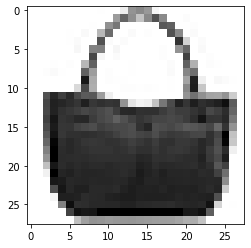

In [12]:
plt.imshow(X_train[100], cmap = "gray_r")
plt.show()

In [13]:
Y_train.shape

(60000,)

In [14]:
Y_train

array([False,  True,  True, ..., False,  True, False])

In [15]:
from keras import layers
from keras import models

In [16]:
#define model

model = models.Sequential()

model.add(layers.Dense(100, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


Stochastic gradient descent was employed as optimizer. Below we will use an improved version of gradient descent which tries to smoothen out oscillations in the descending procedure (gd with momentum, rmsprop or adam optimizers).

In [17]:
#illustration of different optimizers
from IPython.display import Image
Image(url='gdanimations.gif')  

In [18]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2379 - acc: 0.9117
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1690 - acc: 0.9420
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1525 - acc: 0.9484
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1433 - acc: 0.9508
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1368 - acc: 0.9520
Epoch 6/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1322 - acc: 0.9528
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1283 - acc: 0.9530
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1252 - acc: 0.9536
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1225 - acc: 0.9544
Epoch 10/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1206 - acc: 0.9542

False
[[0.002558]]


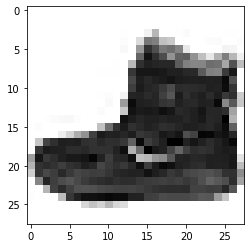

In [19]:
#check per hand prediction on training data vs. reality
plt.imshow(X_train[0], cmap = "gray_r")
print(Y_train[0])
print(model.predict(X_train[0].reshape(1, 784)))

True
[[0.8544678]]


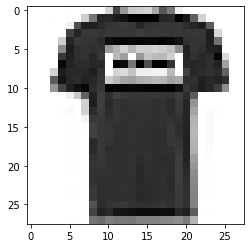

In [20]:
#check per hand prediction on training data vs. reality
plt.imshow(X_train[1],cmap = "gray_r")
print(Y_train[1])
print(model.predict(X_train[1].reshape(1, 784)))

In [21]:
#check the accuracy (per hand)
Y_train_pred = model.predict(X_train.reshape(60000, 784))
np.mean(np.round(Y_train_pred).reshape(-1) == Y_train)

0.95445

In [22]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 2s 40us/step


[0.11901477084755897, 0.95445]

In [23]:
print(model.metrics_names)

['loss', 'acc']


In [24]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 0s 38us/step


[0.125828436550498, 0.9516]

In [25]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


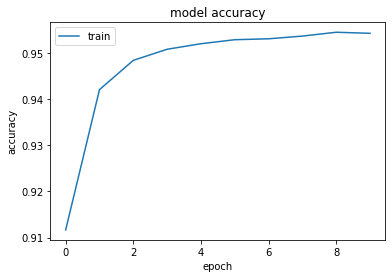

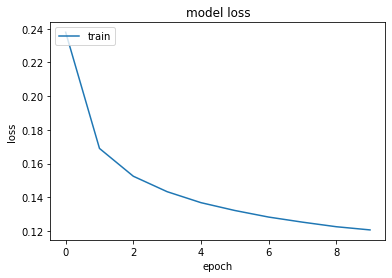

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Many categories

To this aim: Modify final activation function, output dimension and loss function

In [27]:
#load data and define variables
X_train = open_images("train-images-idx3-ubyte.gz")
Y_train = open_labels("train-labels-idx1-ubyte.gz")

X_test = open_images("t10k-images-idx3-ubyte.gz")
Y_test = open_labels("t10k-labels-idx1-ubyte.gz")

In [28]:
from keras import layers
from keras import models
from keras.utils import to_categorical

In [29]:
#use one-hot-encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [30]:
#define model (adapt to categorical situaton)

model = models.Sequential()

model.add(layers.Dense(2048, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(256, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(10, activation = "sigmoid"))
model.summary()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 2,134,794
Trainable params: 2,134,794
Non-trainable params: 0
_________________________________________________________________


In [31]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.8556 - acc: 0.7416
Epoch 2/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.5141 - acc: 0.8242
Epoch 3/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.4980 - acc: 0.8265
Epoch 4/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.4802 - acc: 0.8335
Epoch 5/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.4790 - acc: 0.8320
Epoch 6/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.4753 - acc: 0.8295
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.4740 - acc: 0.8302
Epoch 8/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.4793 - acc: 0.8270
Epoch 9/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.4988 - acc: 0.8157
Epoch 10/10
60000/60000 [==============================] - 17s 277us/step - loss: 

In [32]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 14s 225us/step


[0.4921477650006612, 0.8147166666666666]

In [33]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 2s 224us/step


[0.5238394191265107, 0.801]

In [34]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


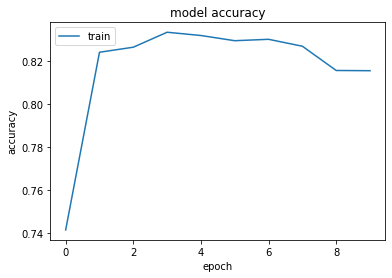

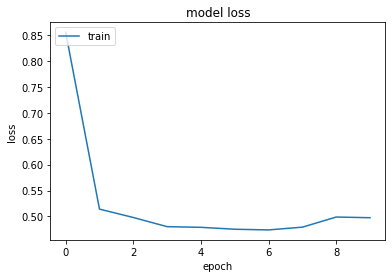

In [35]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [36]:
#model evaluation via confusion matrix (helps to see if classes are well discerned)
Y_pred = model.predict(X_test.reshape(-1, 784))

#check for which category the highest estimate was produced for all examples in the test set
np.argmax(Y_pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
from pandas_ml import ConfusionMatrix

In [38]:
ConfusionMatrix(np.argmax(Y_test, axis = 1), np.argmax(Y_pred, axis = 1))

Predicted    0    1     2     3     4    5    6    7     8     9  __all__
Actual                                                                   
0          745    3    30   128     9    0   65    0    19     1     1000
1            1  941    14    34     7    0    1    0     2     0     1000
2           10    2   672    16   261    0   30    0     9     0     1000
3           16    9    21   900    35    0   16    0     3     0     1000
4            0    1   100    44   822    0   29    0     4     0     1000
5            0    0     0     1     0  917    0   37     3    42     1000
6          143    6   159   105   308    0  248    0    31     0     1000
7            0    0     0     0     0   38    0  876     0    86     1000
8            1    0    33     3     7    6    4    4   942     0     1000
9            0    0     0     1     0   21    0   30     1   947     1000
__all__    916  962  1029  1232  1449  982  393  947  1014  1076    10000

For example: Column "2" line "0": 27 is to be read as: Predicted was category "2" when it was actually category "0". In this way, the confusion matrix allows to see how well our model maps the reality. Ideally, we would like to have a model with vanishing off-diagonal terms.

#### Introducing the softmax as final layer activation function

In [39]:
#define model (adapt to categorical situaton)

model = models.Sequential()

model.add(layers.Dense(2048, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(256, activation = "sigmoid", input_shape = (28 * 28,))) # we have 28*28 pixels
model.add(layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 2,134,794
Trainable params: 2,134,794
Non-trainable params: 0
_________________________________________________________________


In [40]:
#train model
#train on minibatches of 1000 to get an adjustment (thus 60 adjustments per epoch)
history = model.fit(X_train.reshape(60000, 784), Y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 1.0042 - acc: 0.6354
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.6247 - acc: 0.7613
Epoch 3/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.5631 - acc: 0.7872
Epoch 4/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.5252 - acc: 0.8011
Epoch 5/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.4957 - acc: 0.8144
Epoch 6/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.4831 - acc: 0.8175
Epoch 7/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.4712 - acc: 0.8225
Epoch 8/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.4569 - acc: 0.8297
Epoch 9/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.4448 - acc: 0.8327
Epoch 10/10
60000/60000 [==============================] - 17s 277us/step - loss: 

We observe that the tanh and sigmoid activations work better on this problem than relu.

In [41]:
#check accuracy on training set via keras --> use output from fitting process
model.evaluate(X_train.reshape(60000, 784), Y_train)

60000/60000 [==============================] - 15s 250us/step


[0.3866654832839966, 0.8593666666666666]

In [42]:
#check accuracy on test set via keras --> use output from fitting process
model.evaluate(X_test.reshape(10000, 784), Y_test)

10000/10000 [==============================] - 2s 228us/step


[0.4261105730295181, 0.8459]

In [43]:
from pandas_ml import ConfusionMatrix

In [44]:
#model evaluation via confusion matrix (helps to see if classes are well discerned)
Y_pred = model.predict(X_test.reshape(-1, 784))

#check for which category the highest estimate was produced for all examples in the test set
np.argmax(Y_pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [45]:
ConfusionMatrix(np.argmax(Y_test, axis = 1), np.argmax(Y_pred, axis = 1))

Predicted     0    1     2    3     4    5     6     7    8     9  __all__
Actual                                                                    
0           807    2     7   31     2    0   140     0   10     1     1000
1             5  956     5   23     4    0     5     0    2     0     1000
2            10    2   741    4   138    0   103     0    2     0     1000
3            37   18     8  846    41    0    46     0    4     0     1000
4             0    1   134   39   731    0    91     0    4     0     1000
5             0    0     0    1     0  936     0    34    2    27     1000
6           146    1   112   24    95    0   609     0   13     0     1000
7             0    0     0    0     0   20     0   930    0    50     1000
8             1    1     4    3     7    2    32     4  946     0     1000
9             0    0     0    0     0    7     0    35    1   957     1000
__all__    1006  981  1011  971  1018  965  1026  1003  984  1035    10000

We understand from the different scores (training and test scores are pretty close) that by increaing the network capacity more statistical intricacies of the data set could be unveiled. 

If they were to far from each other (while the training score would be good) the complexity would be to big and we would observe overfitting.

If both scores would be bad, more data could help.